# Overfitting and Underfitting

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


Our initial function is just a cosine wave with some noise added on top

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

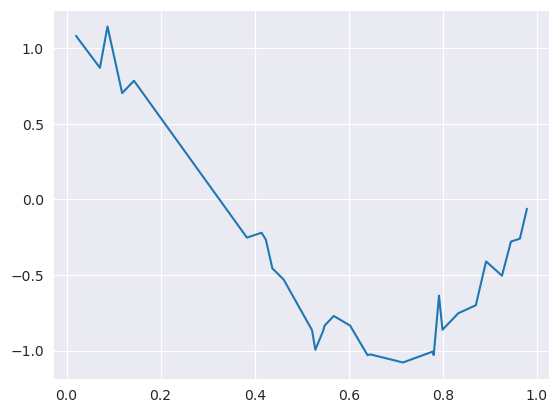

In [3]:
plt.plot(X,y)
plt.show()

Training a simple linear regressor on this data does not perform well.

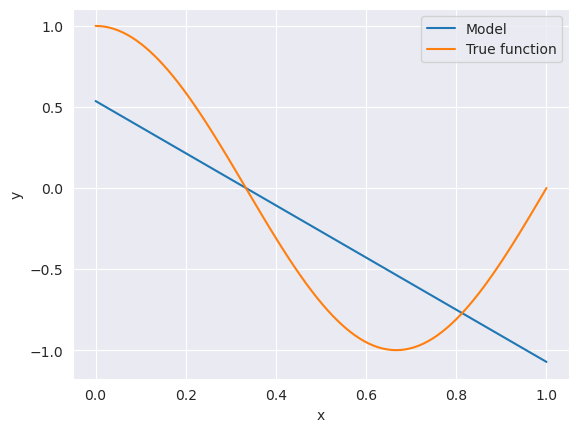

In [5]:
linear_regression = LinearRegression()
linear_regression.fit(X[:, np.newaxis], y)

X_test = np.linspace(0, 1, 100)
y_pred = linear_regression.predict(X_test[:, np.newaxis])
plt.plot(X_test, y_pred, label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


Using the polynomials trick from last jupyter notebook we can help our model to capture the function a bit better. Lets put what we did above and the ploynomial creation in a function so we can call it with different degrees.

In [11]:
def linear_regression_with_polynomials_of_degree(degree):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)
    
    
    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])
    plt.plot(X_test, y_pred, label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

Calling this with degree = 1  leads to the same model as above.

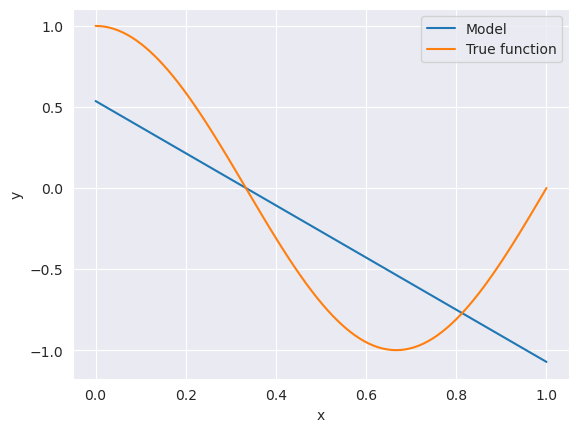

In [12]:
linear_regression_with_polynomials_of_degree(1)

How about degree = 2?
This is looking better, but we are still underfitting, meaning that our model can not grasp the complexity of the true function.

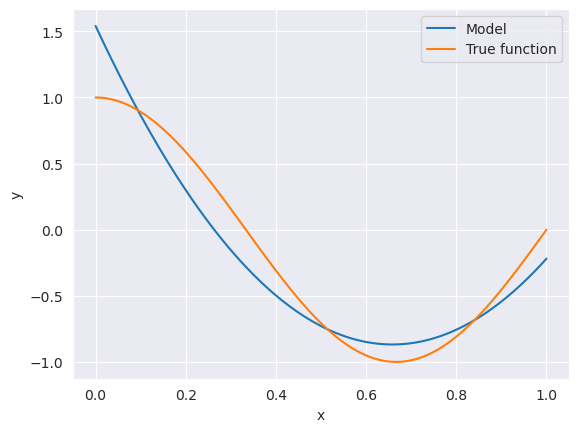

In [14]:
linear_regression_with_polynomials_of_degree(2)

How about degree = 4?

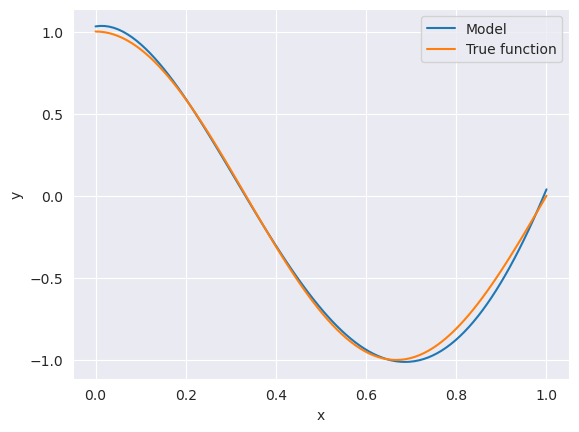

In [15]:
linear_regression_with_polynomials_of_degree(4)


Almost perfect, but what happens if we start to increase the number of degrees further?

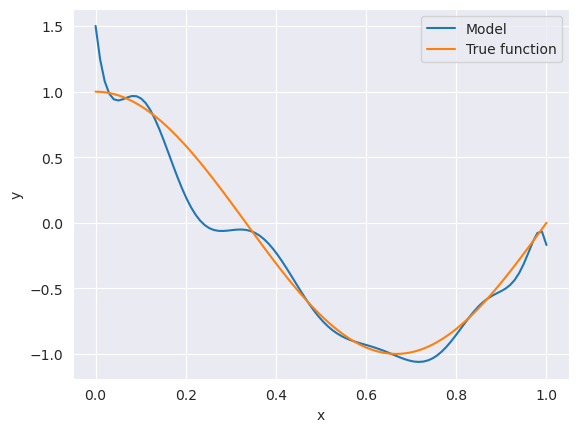

In [21]:
linear_regression_with_polynomials_of_degree(12)


The output above starts having similarities with the noise in the original inputs. We are now significantly overfitting. While the model captures the original trainingset in moore and more detail, it actually is getting worse in modelling the true function.

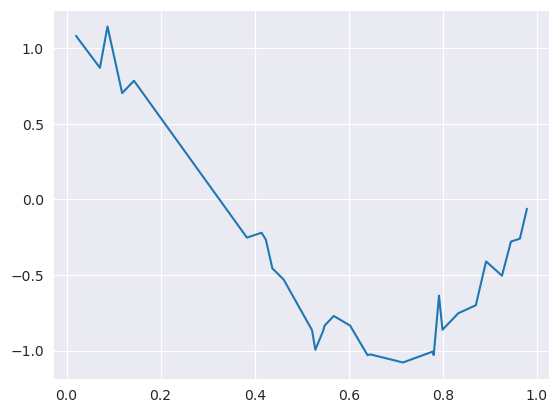

In [22]:
plt.plot(X,y)
plt.show()